In [1]:
# Initial imports/modules/libraries
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import arch as arch

In [24]:
class Asset():
    
    #Class Object Attributes
    
    def __init__(self, ticker, start_date, end_date):
        
        #Attributes
        
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        
    #Operations/Actions (methods)
    
    def percent_change(self):
        """
        Takes in arg "ticker" as a str object,
        and returns closing price percent change information for that
        symbol/ticker.
        """
        
        #YFinance info
        daily_data = yf.download(self.ticker,
                                start=self.start_date,
                                end=self.end_date)
    
        #Choosing the 'Close' Column from the dataframe and running the pct_change function.
        daily_pctchg = daily_data['Close'].pct_change().to_frame().dropna()
                
        #Create blank figure and plot space
        fig, ax = plt.subplots(figsize=(20,10))

        #Add x-axis and y-axis
        ax.plot(daily_pctchg.index.values,
              daily_pctchg,
              color='cornflowerblue')

        #Set title and labels for axes
        ax.set(xlabel="Date",
               ylabel="Percent Change",
               title=f"Daily Percent Change for {self.ticker}\nFrom {self.start_date} to {self.end_date}")

        return plt.show()
    
    def price(self):
    
        """
        Takes in arg "ticker" as a str object,
        and returns closing price information for that
        symbol/ticker.
        """
        
        ##### GETTING THE DATA

        #YFinance info
        daily_data = yf.download(self.ticker,
                    start=self.start_date,
                    end=self.end_date)

        #Choosing the 'Close' Column from the dataframe
        daily_close = daily_data['Close'].dropna()

        ##### PLOTTING THE GRAPH

        #Create blank figure and plot space
        fig, ax = plt.subplots(figsize=(20,10))

        #Add x-axis and y-axis
        ax.plot(daily_close.index.values,
              daily_close,
              color='purple')

        #Set title and labels for axes
        ax.set(xlabel="Date",
               ylabel="Close",
               title=f"Daily Close for {self.ticker}\nFrom {self.start_date} to {self.end_date}")

        return plt.show()

    def volume(self):
    
        """
        Takes in arg "ticker" as a str object,
        and returns volume information for that
        symbol/ticker.
        """
        
        ##### GETTING THE DATA

        #YFinance info
        daily_data = yf.download(self.ticker,
                    start=self.start_date,
                    end=self.end_date)

        #Choosing the 'Volume' Column from the dataframe
        daily_volume = daily_data['Volume'].dropna()

        ##### PLOTTING THE GRAPH

        #Create blank figure and plot space
        fig, ax = plt.subplots(figsize=(20,10))

        #Add x-axis and y-axis
        ax.bar(daily_volume.index.values,
              daily_volume,
              color='chocolate')
        
        #Use StrMethodFormatter
        ax.yaxis.set_major_formatter('{x:1.0f}')
        ax.set_ylabel(ylabel="Volume")

        #Set title and labels for axes
        ax.set(xlabel="Date",
               ylabel="Volume",
               title=f"Daily Volume for {self.ticker}\nFrom {self.start_date} to {self.end_date}")

        return plt.show()

In [25]:
TSLA = Asset("TSLA","2020-01-01","2020-10-01")

[*********************100%***********************]  1 of 1 completed


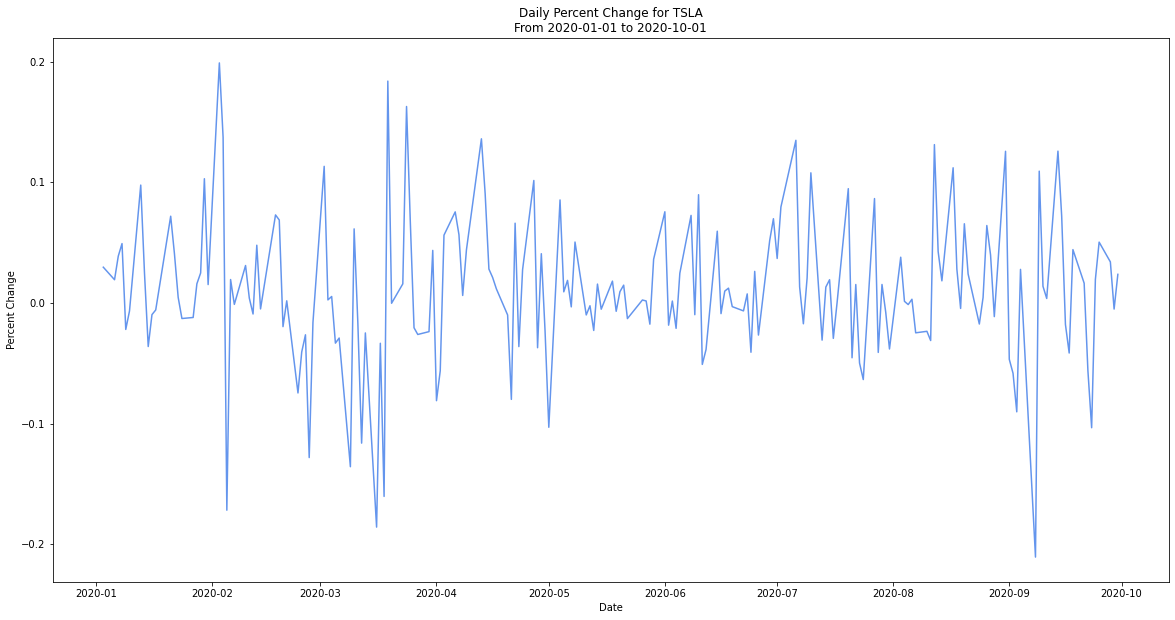

In [26]:
TSLA.percent_change()